# 文字检测

In [ ]:
from modelscope.pipelines import pipeline
from modelscope.utils.constant import Tasks
ocr_detection = pipeline(Tasks.ocr_detection, model='damo/cv_resnet18_ocr-detection-db-line-level_damo')
result = ocr_detection('https://modelscope.oss-cn-beijing.aliyuncs.com/test/images/ocr_detection.jpg')
print(result)

In [1]:
from modelscope.pipelines import pipeline
from modelscope.utils.constant import Tasks
ocr_detection = pipeline(Tasks.ocr_detection, model='damo/cv_resnet18_ocr-detection-db-line-level_damo')
# result = ocr_detection('https://modelscope.oss-cn-beijing.aliyuncs.com/test/images/ocr_detection.jpg')
result = ocr_detection("D:\\wps\\剪印\\auto_generate\\aigc_girls\\2968c2945dedf97a63ba9e5d30ce88ff-精美壁纸：苹果园中的白雪公主\\b1d3925431112c38d77c6aa4b1693f58.JPEG")
print(result)

2023-10-12 00:34:53,180 - modelscope - INFO - PyTorch version 2.0.1+cu117 Found.
2023-10-12 00:34:53,193 - modelscope - INFO - TensorFlow version 2.14.0 Found.
2023-10-12 00:34:53,194 - modelscope - INFO - Loading ast index from C:\Users\73915\.cache\modelscope\ast_indexer
2023-10-12 00:34:53,405 - modelscope - INFO - Loading done! Current index file version is 1.9.2, with md5 3315cddc66f26e5d24d726457a584f8b and a total number of 941 components indexed
2023-10-12 00:34:55,032 - modelscope - INFO - Model revision not specified, use revision: v1.3.0
c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-10-12 00:35:00,364 - modelscope - INFO - initiate model from C:\Users\73915\.cache\modelscope\hub\damo\cv_resnet18_ocr-detection-db-line-level_damo
2023-10-12 00:35:00,366 - modelscope - 

{'polygons': array([[1993, 3883, 2541, 3897, 2538, 3971, 1989, 3957]])}


In [2]:
from modelscope.pipelines.cv.ocr_detection_pipeline import OCRDetectionPipeline
from PIL import Image, ImageSequence, ImageDraw

img_pil = Image.open("D:\\wps\\剪印\\auto_generate\\aigc_girls\\2968c2945dedf97a63ba9e5d30ce88ff-精美壁纸：苹果园中的白雪公主\\b1d3925431112c38d77c6aa4b1693f58.JPEG")

result = ocr_detection(img_pil)
print(result)

{'polygons': array([[1993, 3883, 2541, 3897, 2538, 3971, 1989, 3957]])}


In [3]:
img_pil.size

(2605, 4023)

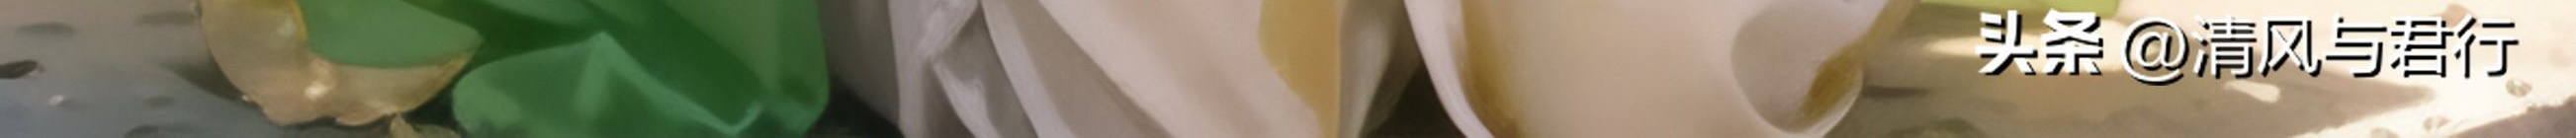

In [6]:
W, H = img_pil.size
W, H

height = 140

left_top = (0, H-height)
right_top = (W, H)

crop_pil = img_pil.crop(left_top + right_top)
display(crop_pil)


In [7]:
# result = ocr_detection(crop_pil)
# print(result)

# img1 = ImageDraw.Draw(crop_pil)

# for pos in result['polygons']:
#     shape = (tuple(pos[:2]), tuple(pos[4:6]))
#     img1.rectangle(shape, fill ="#ffff33", outline ="red")
#     crop_pil.show()

{'polygons': array([[2153,   27, 2209,   27, 2209,   75, 2153,   75],
       [2185,    6, 2303,    2, 2306,   91, 2188,   95],
       [2254,    0, 2569,    0, 2570,  100, 2254,  103],
       [1978,    0, 2147,    0, 2149,   95, 1979,   97]])}


In [8]:
import numpy as np
crop_pil.size
mask_pil = Image.fromarray(np.zeros(crop_pil.size[::-1]), mode="L")

img1 = ImageDraw.Draw(mask_pil)

for pos in result['polygons']:
    shape = (tuple(pos[:2]), tuple(pos[4:6]))
    img1.rectangle(shape, fill ="#ffff33", outline ="red")
mask_pil.show()

In [9]:
from modelscope.pipelines.cv.image_inpainting_pipeline import ImageInpaintingPipeline
import cv2
from modelscope.outputs import OutputKeys
from modelscope.pipelines import pipeline
from modelscope.utils.constant import Tasks

inpainting:ImageInpaintingPipeline = pipeline(Tasks.image_inpainting, model='damo/cv_fft_inpainting_lama')

inpainting = pipeline(Tasks.image_inpainting, model='damo/cv_fft_inpainting_lama')

input = {
        'img':crop_pil,
        'mask':mask_pil,
}


result = inpainting(input)
vis_img = result[OutputKeys.OUTPUT_IMG]
cv2.imwrite('result.png', vis_img)

2023-10-12 00:37:38,386 - modelscope - INFO - Model revision not specified, use revision: v1.0.0
2023-10-12 00:37:39,123 - modelscope - INFO - initiate model from C:\Users\73915\.cache\modelscope\hub\damo\cv_fft_inpainting_lama
2023-10-12 00:37:39,125 - modelscope - INFO - initiate model from location C:\Users\73915\.cache\modelscope\hub\damo\cv_fft_inpainting_lama.
2023-10-12 00:37:39,130 - modelscope - INFO - initialize model from C:\Users\73915\.cache\modelscope\hub\damo\cv_fft_inpainting_lama
2023-10-12 00:37:39,293 - modelscope - INFO - BaseInpaintingTrainingModule init called, predict_only is False
2023-10-12 00:37:40,580 - modelscope - INFO - BaseInpaintingTrainingModule init done
2023-10-12 00:37:40,581 - modelscope - INFO - loading pretrained model from C:\Users\73915\.cache\modelscope\hub\damo\cv_fft_inpainting_lama\pytorch_model.pt


Loading weights for net_encoder


2023-10-12 00:37:41,050 - modelscope - WARNING - No preprocessor field found in cfg.
2023-10-12 00:37:41,052 - modelscope - WARNING - No val key and type key found in preprocessor domain of configuration.json file.
2023-10-12 00:37:41,053 - modelscope - WARNING - Cannot find available config to build preprocessor at mode inference, current config: {'model_dir': 'C:\\Users\\73915\\.cache\\modelscope\\hub\\damo\\cv_fft_inpainting_lama'}. trying to build by task and model information.
2023-10-12 00:37:41,054 - modelscope - WARNING - No preprocessor key ('FFTInpainting', 'image-inpainting') found in PREPROCESSOR_MAP, skip building preprocessor.
2023-10-12 00:37:41,059 - modelscope - INFO - loading model from dir C:\Users\73915\.cache\modelscope\hub\damo\cv_fft_inpainting_lama
2023-10-12 00:37:41,060 - modelscope - INFO - BaseInpaintingTrainingModule init called, predict_only is True
2023-10-12 00:37:41,490 - modelscope - INFO - BaseInpaintingTrainingModule init done
2023-10-12 00:37:41,492

Loading weights for net_encoder


2023-10-12 00:37:44,479 - modelscope - WARNING - No preprocessor field found in cfg.
2023-10-12 00:37:44,480 - modelscope - WARNING - No val key and type key found in preprocessor domain of configuration.json file.
2023-10-12 00:37:44,481 - modelscope - WARNING - Cannot find available config to build preprocessor at mode inference, current config: {'model_dir': 'C:\\Users\\73915\\.cache\\modelscope\\hub\\damo\\cv_fft_inpainting_lama'}. trying to build by task and model information.
2023-10-12 00:37:44,482 - modelscope - WARNING - No preprocessor key ('FFTInpainting', 'image-inpainting') found in PREPROCESSOR_MAP, skip building preprocessor.
2023-10-12 00:37:44,486 - modelscope - INFO - loading model from dir C:\Users\73915\.cache\modelscope\hub\damo\cv_fft_inpainting_lama
2023-10-12 00:37:44,488 - modelscope - INFO - BaseInpaintingTrainingModule init called, predict_only is True
2023-10-12 00:37:44,915 - modelscope - INFO - BaseInpaintingTrainingModule init done
2023-10-12 00:37:44,916

True

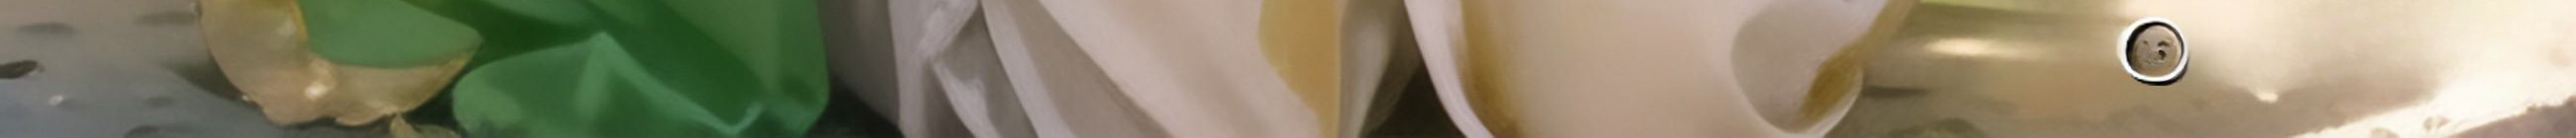

In [10]:
cleaned_img = Image.fromarray(np.flip(vis_img, -1))
display(cleaned_img)

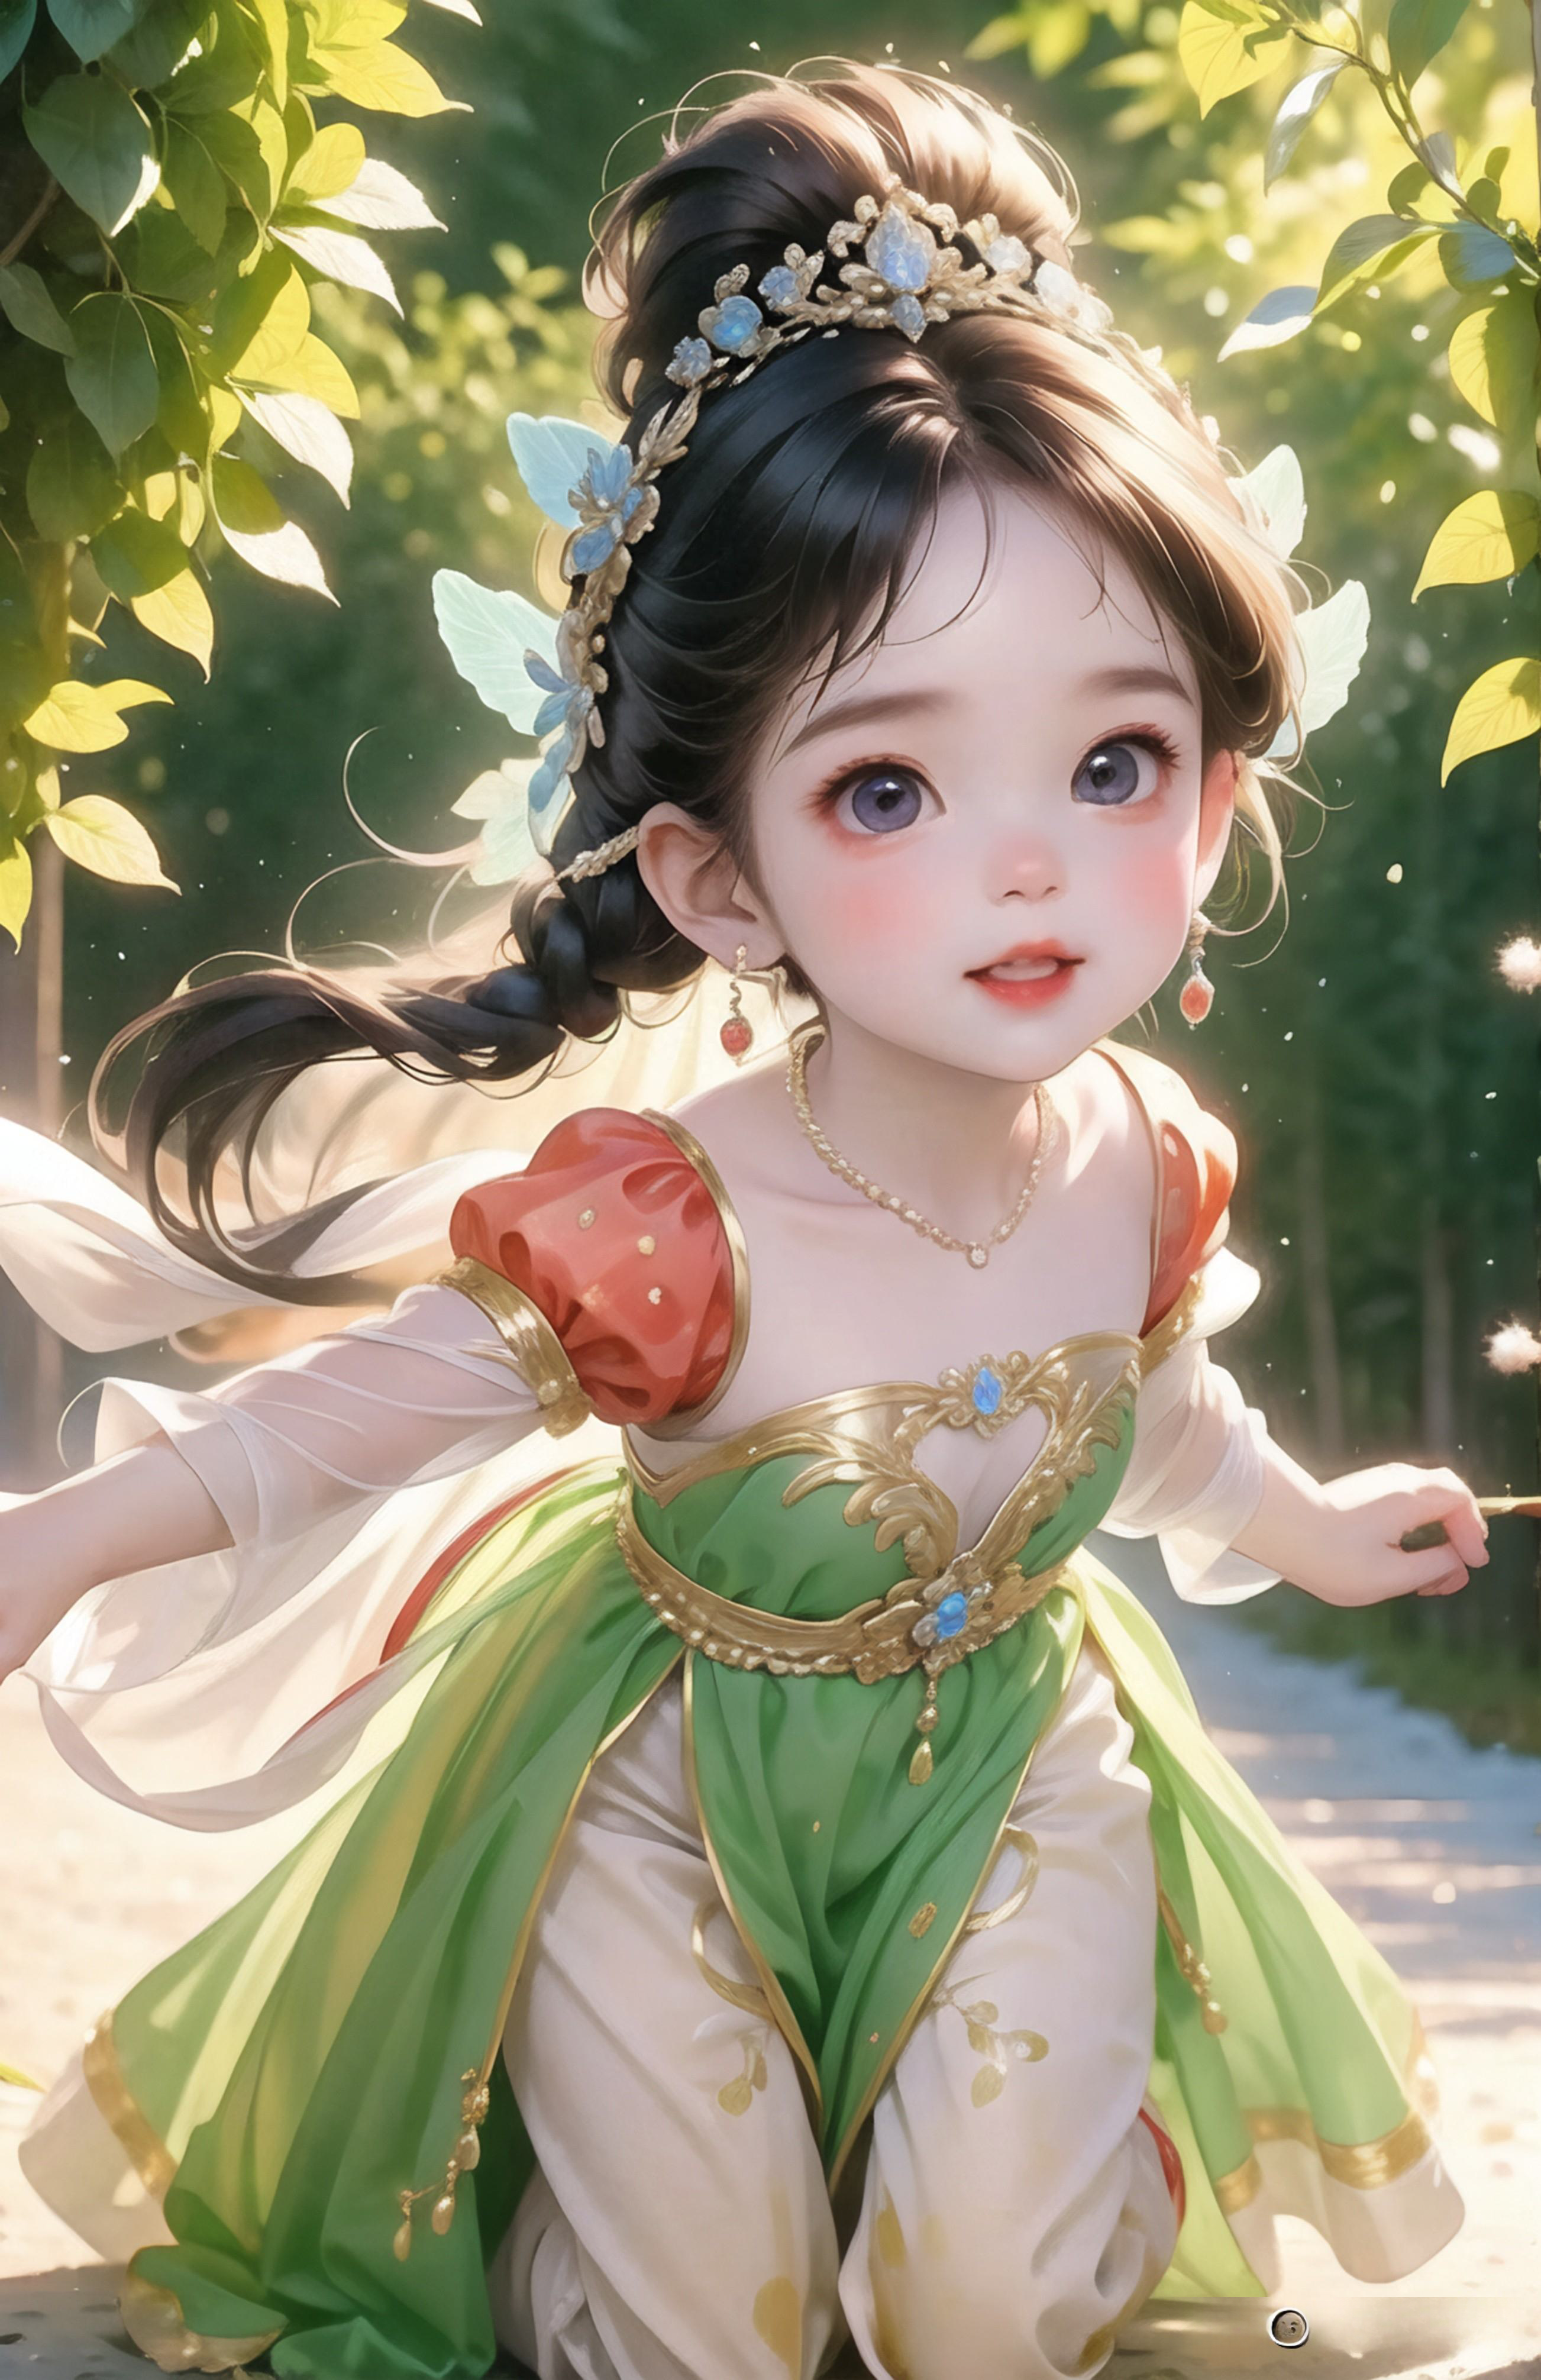

In [11]:
from copy import deepcopy
imp_pil_bak = deepcopy(img_pil)
imp_pil_bak.paste(cleaned_img, box=left_top)
display(imp_pil_bak)

In [22]:
import cv2
from PIL import Image, ImageSequence, ImageDraw 
import numpy as np
from pathlib import Path
from copy import deepcopy
import math
from loguru import logger
from loguru import logger as loguru_logger


def image_read1(file_path: str):
    """解决中文路径cv2报错问题

    Args:
        file_path (str): _description_

    Returns:
        _type_: _description_
    """
    cv_img = cv2.imdecode(np.fromfile(file_path, dtype=np.uint8), cv2.IMREAD_COLOR) # type: ignore
    return cv_img


def image_read(file_path: str)->np.ndarray:
    """解决中文路径cv2报错问题

    Args:
        file_path (str): _description_

    Returns:
        _type_: _description_
    """
    image_PIL_RGB = Image.open(file_path)
    logger.debug(f"input image shape={image_PIL_RGB.size}, mode={image_PIL_RGB.mode}, type={type(image_PIL_RGB)}")
    
    if image_PIL_RGB.format in ['GIF']:
        for frame in ImageSequence.Iterator(image_PIL_RGB):
            # frame.save("frame%d.png" % index)
            # index += 1
            logger.debug(f"GIF frame 1: type={type(frame)}")
            image_PIL_RGB = frame
            break
    elif image_PIL_RGB.format in ['PNG']: # png 4通道转JPG 3通道
        image_PIL_RGB = image_PIL_RGB.convert('RGB')
        
    
    image_np_RGB = np.array(image_PIL_RGB)

    image_np_BGR = np.flip(image_np_RGB, -1)
    return image_np_BGR


@loguru_logger.catch
def remove(img_file_name, output_path=None, use_ocr=False, model='cv2', mark_position='bottom_right', inpaintRadius=1) -> str:
    """_summary_

    Args:
        img_file_name (_type_): _description_
        output_path (_type_, optional): _description_. Defaults to None.
        model (str, optional): _description_. Defaults to 'cv2'.
        mark_position (str, optional): _description_. Defaults to 'bottom_right'.
        inpaintRadius (int, optional): _description_. Defaults to 2.

    Returns:
        str: _description_
    """
    image_suffix = '.jpg'
    if output_path is None:
        img_path = Path(img_file_name)
        
        # process GIF, FIXME: maybe need to improve
        if image_suffix.lower() in ['.gif']:
            image_suffix = '.jpg'
        elif image_suffix.lower() in ['.png']:
            image_suffix = '.jpg'
        else:
            image_suffix = img_path.suffix
        output_path = img_path.parent.joinpath(img_path.stem + "_cleaned" + image_suffix)
    else:
        output_path = Path(output_path)
        image_suffix = output_path.suffix
    # if output_path.exists():
    #     logger.debug(f"cleaned file: {str(output_path)} exist, so skipped")
    #     return str(output_path)
    
    logger.debug(f"remove watermark: {img_file_name}")
    img = image_read(img_file_name) # H W C, BGR
    logger.debug(f"input image shape: {img.shape}")
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    
    # FIXME: 也可以使用OCR方法确定区域。
    _shape = img.shape
    width = math.ceil(0.45 * _shape[1]) 
    height = 40
    left_top_x = _shape[1] - width
    left_top_y = _shape[0] - height


    pad = 10
    
    # 顺时针
    if mark_position == "bottom_right":
        left_top_x = _shape[1] - width
        left_top_y = _shape[0] - height
        point1 = [left_top_x, left_top_y]
        point2 = [left_top_x + width, left_top_y]
        point3 = [left_top_x + width - pad, left_top_y + height - pad]
        # point3 = [left_top_x +  pad, left_top_y + pad]
        point4 = [left_top_x, left_top_y + height]
    
    # polygon = np.array([point1, point2, point3, point4], np.int32) # type: ignore
    
    
    # result = ocr_detection('3.jpg')
    # rectangle = result['polygons'][0]
    # point1 = rectangle[:2]
    # point3 = rectangle[4:6]
    
    img.crop
    

    # cv2.fillConvexPoly(mask, polygon, (255, 255, 255))
    cv2.rectangle(mask, tuple(point1), tuple(point3), (255, 255, 255), -1) # type: ignore
    

    print('mask', np.sum(mask))
    if model == "cv2":
        img_inpaint = cv2.inpaint(img, mask, inpaintRadius, cv2.INPAINT_TELEA) # type: ignore
        # img_inpaint = cv2.inpaint(img, mask, inpaintRadius, cv2.INPAINT_NS) 
        
        # cv2.imwrite(str(output_path), img_inpaint) # type: ignore
        # cv2.imencode(image_suffix, img_inpaint)[1].tofile(str(output_path)) # type: ignore # 解决中文路径。
        img_inpaint = img_inpaint[:,:,::-1]
        img_tmp = Image.fromarray(img_inpaint)
        
        img_tmp.save(output_path)
        logger.debug(f"cleaned file: {str(output_path)}")
    # return str(output_path)
    # creating new Image object 
    
    # create rectangle image 
    img1 = ImageDraw.Draw(img_tmp)   
    shape = [tuple(point1), tuple(point3)]
    img1.rectangle(shape, fill ="#ffff33", outline ="red") 
    img_tmp.show()


file_name2 = "3.jpg"

remove(file_name2)

2023-10-10 22:52:25.741 | DEBUG    | __main__:remove:86 - remove watermark: 3.jpg
2023-10-10 22:52:25.742 | DEBUG    | __main__:image_read:34 - input image shape=(640, 360), mode=RGB, type=<class 'PIL.JpegImagePlugin.JpegImageFile'>
2023-10-10 22:52:25.748 | DEBUG    | __main__:remove:88 - input image shape: (360, 640, 3)
2023-10-10 22:52:26.115 | DEBUG    | __main__:remove:134 - cleaned file: 3_cleaned.jpg


mask 367710


In [16]:
tuple([1,2])

(1, 2)